# Estimating distributions (part 2)
The goal of this notebook is to explore a first approach to approximate $p(y|x)$ and $p(x|y)$ on a tabular dataset where $x$ is real-valued, $x\in\mathbb{R}^k$, and the target $y$ is discrete and finite, $y\in\{0,\ldots,d\}⊆\mathbb{N}, d\geq 1$.

## Imports

In [17]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load data set

In [3]:
iris = datasets.load_iris()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
X = iris.data
y = iris.target

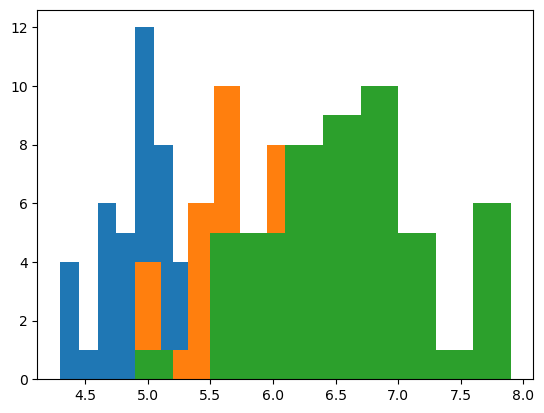

In [14]:
x = X[:,0]
for i in range(3):
    plt.hist(x[y==i])

## Approximate $p(y|x)$
Take $x$ to be sepal length and estimate the conditional probability of the target variable $y$ given $x$. Then, sample 10 values of $y$ given a $x=4.75$.

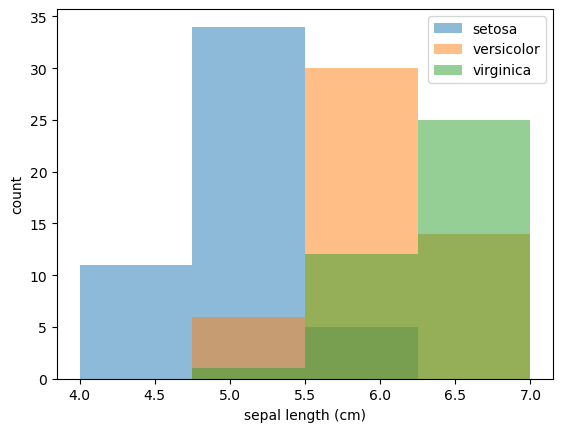

In [25]:
x = X[:,0]

bins = np.linspace(4,7,5)

for i in range(3):
    plt.hist(x[y==i],bins,alpha=0.5, label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
plt.show()

In [50]:
hist = np.zeros((3,4))
for i in range(3):
    lengths = x[y==i]
    hist[i] =  np.histogram(lengths, bins)[0]


In [51]:
hist

array([[11., 34.,  5.,  0.],
       [ 0.,  6., 30., 14.],
       [ 0.,  1., 12., 25.]])

In [52]:
counts = pd.DataFrame(hist, columns=['4-4.75','4.75-5.5','5.5-6.25','6.25-7'], index=iris.target_names)
counts

,4-4.75,4.75-5.5,5.5-6.25,6.25-7
setosa,11.0,34.0,5.0,0.0
versicolor,0.0,6.0,30.0,14.0
virginica,0.0,1.0,12.0,25.0


In [54]:
proba = counts
for i in range(counts.shape[1]):
    proba.iloc[:,i] = proba.iloc[:,i]/proba.iloc[:,i].sum()
proba

,4-4.75,4.75-5.5,5.5-6.25,6.25-7
setosa,1.0,0.829268,0.106383,0.000000
versicolor,0.0,0.146341,0.638298,0.358974
virginica,0.0,0.024390,0.255319,0.641026


In [57]:
np.random.choice(iris.target_names, size=10, p=proba['4.75-5.5'])

array(['setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

## Approximate $p(x|y)$
Take $y$ to be setosa and estimate the probability of sepal length given setosa (or, equivalently, the *likelihood* of setosa given sepal length). Then, generate 10 samples of sepal length and label them appropriately.

# oblig

y e {s, ve, vi} 

2.1 estimacion usando histogramas (linspace, digitize)

2.2 Mezcla de gaussianas , pl=N(mu0, sigma0) + N(mu1, sigma1) + N(mu2, sigma2)

Esto no va en esta notebook pero lo dejo

3. Autoregressive model (NN) + MNIST
4. Idea de obligatorio 2